# Import libraries

In [579]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

#Remove the warnings
import warnings
warnings.filterwarnings("ignore")


In [580]:
#load the data set
df=sns.load_dataset("tips")
#Print the first 5 rows
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Explore the data/EDA

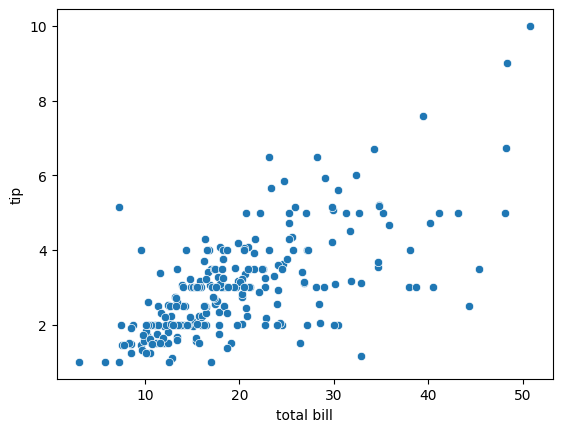

In [581]:
sns.scatterplot(x="total_bill",y="tip",data=df)
plt.xlabel("total bill")
plt.ylabel("tip")
plt.show()

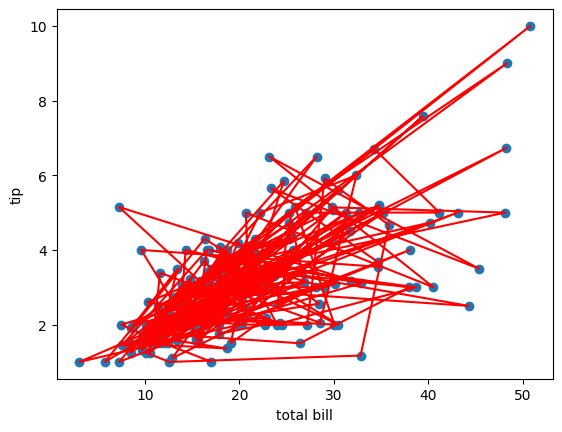

In [582]:
x=df[["total_bill"]]
y=df['tip']
plt.scatter(x='total_bill',y='tip',data=df)
plt.plot(x,y,color='r')
plt.xlabel("total bill")
plt.ylabel("tip")
plt.show()
#IF we use without training then overfitting occur

In [583]:
#max size
df['size'].max()

6

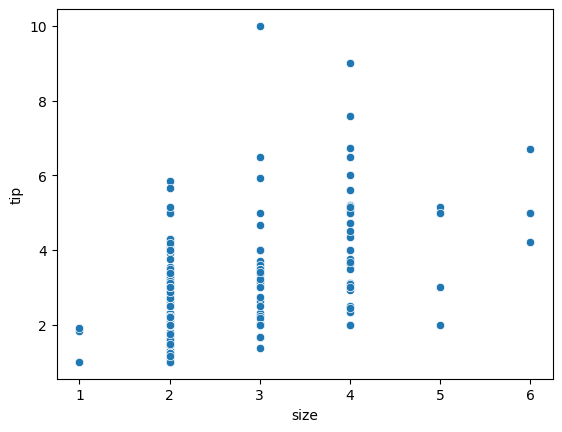

In [584]:
#Check the relation of tip and size
sns.scatterplot(data=df,x="size",y="tip")
plt.show()

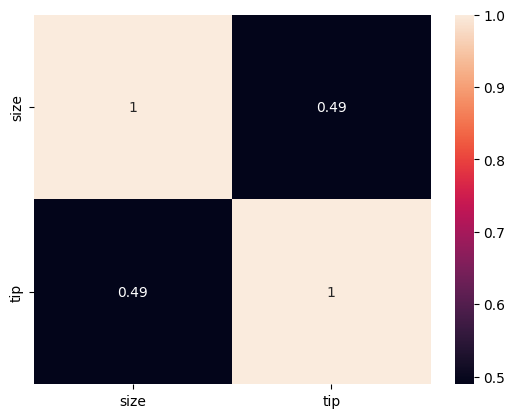

In [585]:
#Check the corelation 
df1=df[["size","tip"]]
df1=df1.corr()

sns.heatmap(data=df1,annot=True)
plt.show()

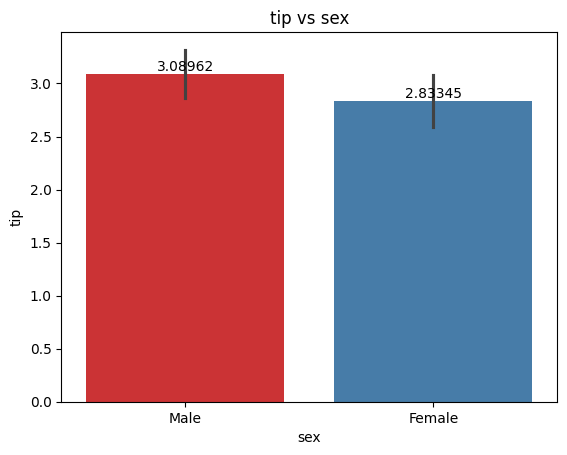

In [586]:
# Tip vs sex
ax=sns.barplot(data=df,x="sex",y="tip",palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.title("tip vs sex")
plt.show()


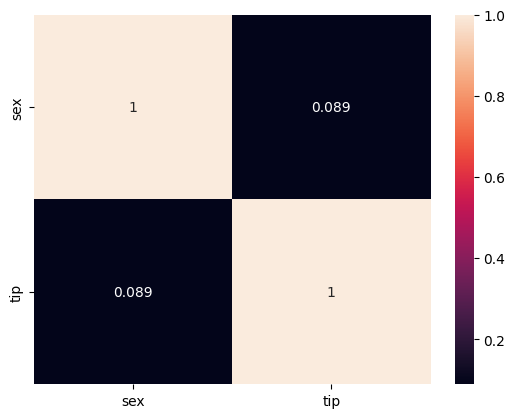

In [587]:
df["sex"]=LabelEncoder().fit_transform(df["sex"])
df2=df[["sex","tip"]]
df2=df2.corr()
sns.heatmap(data=df2,annot=True)
plt.show()

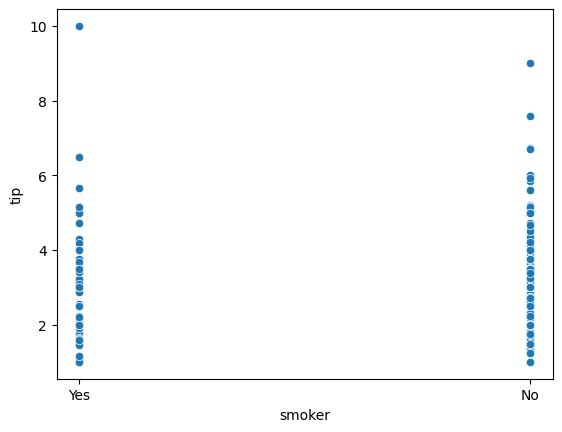

In [588]:
#tip vs smoker
sns.scatterplot(data =df,x="smoker",y="tip")
plt.show()

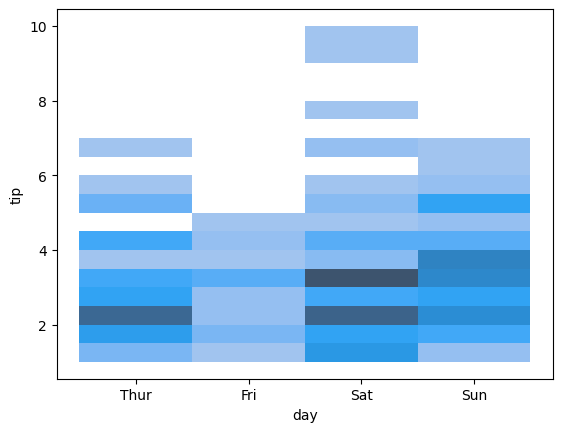

In [589]:
sns.histplot(data=df,x="day",y="tip")
plt.show()

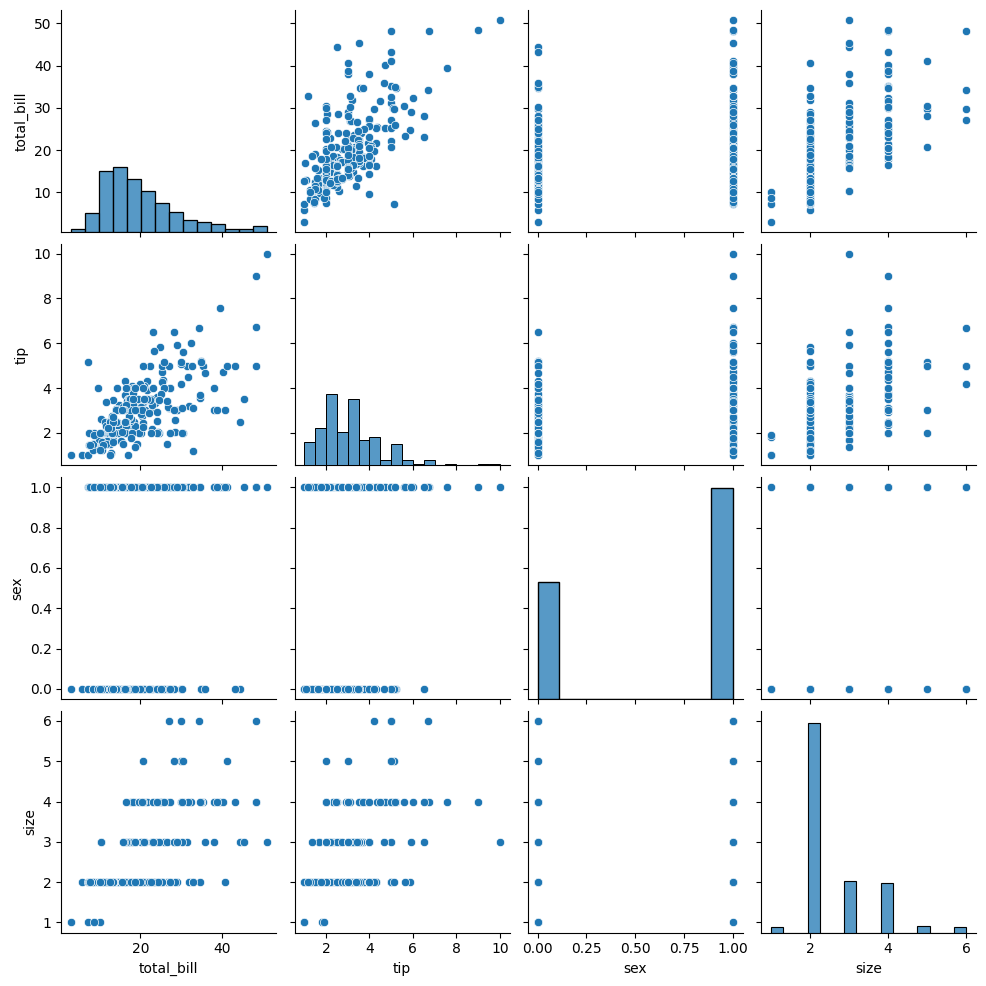

In [590]:
#Check the relation of tip with other column
sns.pairplot(df)
plt.show()

# Data Preprocessing

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    int32   
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(3), float64(2), int32(1), int64(1)
memory usage: 8.0 KB


In [592]:
df.describe()

,total_bill,tip,sex,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,2.569672
std,8.902412,1.383638,0.479967,0.951100
min,3.070000,1.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,2.000000
75%,24.127500,3.562500,1.000000,3.000000
max,50.810000,10.000000,1.000000,6.000000


In [593]:
# Check the missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [594]:
# Check the duplicate values
df.duplicated().sum()

1

In [595]:
#Drop the dublicated values
df=df.drop_duplicates()

In [596]:
df.duplicated().sum()

0

**Outliers treatment**

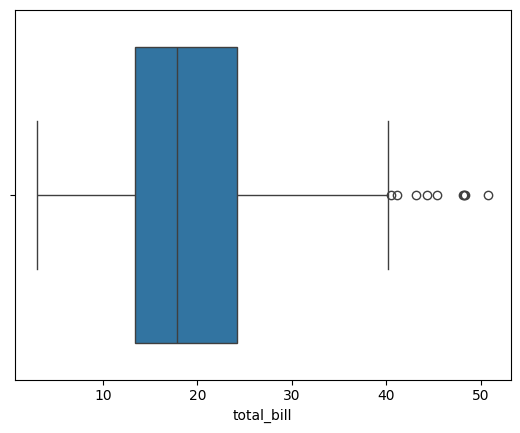

In [597]:
#Outlier in total bill column
sns.boxplot(data=df,x="total_bill")
plt.show()

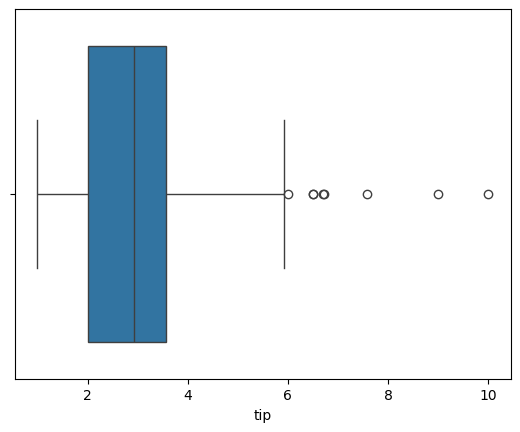

In [598]:
#Outlier in tip column
sns.boxplot(data=df,x="tip")
plt.show()

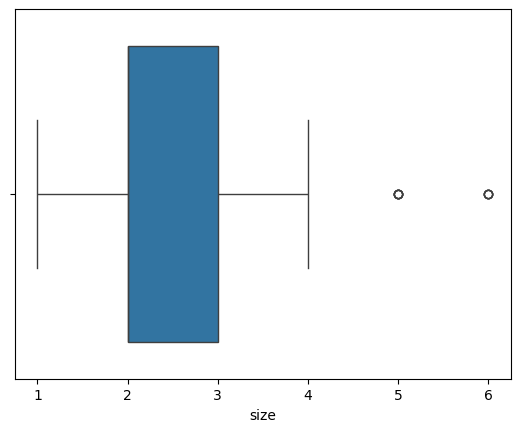

In [599]:
#Outlier in size column
sns.boxplot(data=df,x="size")
plt.show()

In [600]:
#Remove the 
d=["total_bill","tip","size"]

In [601]:
# # #Remove the all outlier
# def outlier(col):
#     q1,q3=np.percentile(col,[25,75])
#     innerquartilerange=q3-q1
#     loweroutlier=q1-1.5*innerquartilerange
#     upperoutlier=q3+1.5*innerquartilerange
#     return loweroutlier,upperoutlier
    
# for i in df[d]:
#     loweroutlier,upperoutier=outlier(df[i])
#     df[i]=np.where(df[i]<loweroutlier,loweroutlier,df[i]) #If less than lower outlier then fill it loweroutlier or as it
#     df[i]=np.where(df[i]>upperoutier,upperoutier,df[i])


**convert the text into numeric**

In [607]:
#encoding
for i in df.columns:
    if df[i].dtype=="object" or df[i].dtype=="category":
        df[i]=LabelEncoder().fit_transform(df[i])

**Convert the data into same format**

In [608]:
scaler=MinMaxScaler()#If we use this then predication is high but best fit line good
df["total_bill"]=scaler.fit_transform(df[["total_bill"]])
df["tip"]=scaler.fit_transform(df[["tip"]])
# df["sex"]=scaler.fit_transform(df[["sex"]])
# df["size"]=scaler.fit_transform(df[["size"]])

In [609]:
df.sample(2)

,total_bill,tip,sex,smoker,day,time,size
24,0.350859,0.242222,1,0,1,0,2
19,0.368245,0.261111,1,0,1,0,3


In [610]:
df.shape

(243, 7)

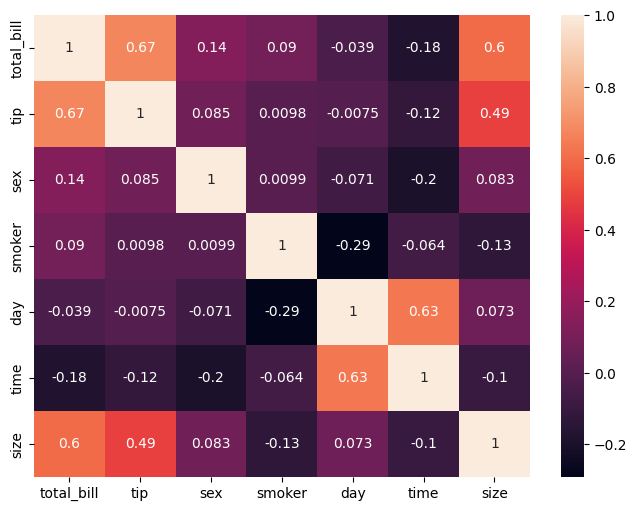

In [611]:
#Check the corelation between the data
plt.figure(figsize=(8,6))
d=df.corr()
sns.heatmap(data=d,annot=True)
plt.show()

In [612]:
df.shape

(243, 7)

# Apply ML model

In [613]:
#Select the  feature and target values
X=df[["total_bill"]]
Y=df["tip"]

#Test and train the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [614]:

#build a model
model=LinearRegression()

#Train the model
model.fit(X_train,Y_train)

#Predict the model
Y_pred=model.predict(X_test)

#take the model intercept and coefficent
m=model.coef_
b=model.intercept_
print("Model coefficent ", model.coef_)

print("model intercept ",model.intercept_)

print("Y = ",m," * X","+",b )

Model coefficent  [0.52933557]
model intercept  0.03796972762927145
Y =  [0.52933557]  * X + 0.03796972762927145


In [578]:
#evaluate the model
print("MSE = ",mean_squared_error(Y_test,Y_pred))
print("R2 score= ",r2_score(Y_test,Y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,Y_pred)))

MSE =  0.01420681551950454
R2 score=  0.5276979930058587
RMSE =  0.11919234673209744


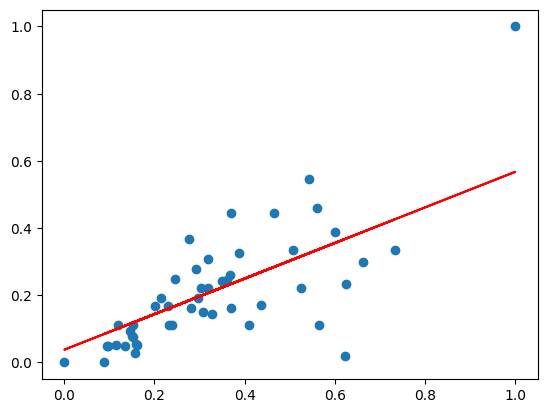

In [615]:
#Plot the data and model
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color='r')
plt.show()

# Make the predication

In [616]:
model.predict([[0.431713]])

array([0.26649077])

In [617]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0,0,2,0,2
1,0.152283,0.073333,1,0,2,0,3
2,0.375786,0.277778,1,0,2,0,3
3,0.431713,0.256667,1,0,2,0,2
4,0.450775,0.290000,0,0,2,0,4


**Polynomial Regression**

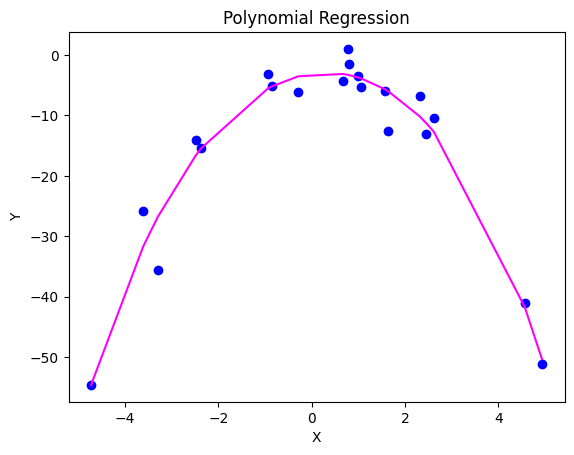

In [324]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator

# Step 1: Create Dummy Data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + np.random.normal(-3, 3, 20)

# Reshaping for the model
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Step 2: Polynomial Transformation
degree = 4  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Step 4: Plotting the results
plt.scatter(x, y, color='blue')
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sorted_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='magenta')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Report  

**A value close to 1 indicates a strong positive correlation and 0 has no relation and -1 has strong negative correlation**   
**0.49 --> this show the size has not the strongest  relation but it moderate useful**

## Correlation between the tip vs other features
--> tip vs time and day  has negative correlation  
-- > tip vs total bill has strong correlation  
--> tip vs size has also strong correlation   
-->tip vs smoker has positive correlation but weak.  
--> tip vs sex has positive correlation but it does not strong correlation    

--> By Removing outliers (it is not necessary)  it decrease the r2 score and scattering data points from predict line , so i simply comment the outliers function. 

In [325]:
# You can further technique use  to minimize error and  increase the r2 score get better result 
# and remove the outliers